# Titanic Exploratory Data Analysis (EDA)

**Author:** Kevin Hennelly  
**Course:** Data Analytics Project 6 – Custom EDA  
**Date:** September 2025  

---

## 1. Introduction
This project explores the Titanic dataset using exploratory data analysis (EDA).  
The goal is to investigate survival rates across different passenger characteristics,  
identify meaningful patterns, and present insights with both code and visualizations.

Used:
- **Python** (pandas, matplotlib, seaborn) for data analysis and visualization.  
- **Markdown** for narrative explanations.  

This notebook demonstrates a professional workflow by mixing narrative, analysis, and visualization.

### Key Findings (summary)

- Overall survival rate: 38.38%.
- By sex: females ~74.20% vs males ~18.89% (large gap).
- By class: First ~62.96%, Second ~47.28%, Third ~24.24% (clear downward trend).
- Travel companions: Not Alone ~50.56% vs Alone ~30.35%.
- Embarkation: survival varies by embarkation town. Cherbourg ~55.35%, Queenstown ~38.96%, Southampton ~33.69% (see `survival_by_embark` for details).

Notes: percentages are computed from the local `titanic.csv` and reflect this dataset's composition.

In [2]:
print("Shape:", df.shape)
df.info()
df.isnull().sum().sort_values(ascending=False)

Shape: (891, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   survived        891 non-null    int64   
 1   pclass          891 non-null    int64   
 2   sex             891 non-null    object  
 3   age             714 non-null    float64 
 4   sibsp           891 non-null    int64   
 5   parch           891 non-null    int64   
 6   fare            891 non-null    float64 
 7   embarked        889 non-null    object  
 8   class           891 non-null    category
 9   who             891 non-null    object  
 10  adult_male      891 non-null    bool    
 11  deck            203 non-null    object  
 12  embark_town     889 non-null    object  
 13  alive           891 non-null    object  
 14  alone           891 non-null    bool    
 15  survived_label  891 non-null    category
 16  survived_num    891 non-null    int64   
 17 

deck              688
age               177
embark_town         2
embarked            2
pclass              0
survived            0
parch               0
fare                0
sibsp               0
sex                 0
who                 0
class               0
adult_male          0
alive               0
alone               0
survived_label      0
survived_num        0
alone_label         0
dtype: int64

## 3. Summary Statistics
Basic descriptive statistics for numeric and categorical features.

In [3]:
# Numeric stats
num_stats = df.describe()
# Categorical stats
cat_stats = df.describe(include="object")
num_stats, cat_stats

(         survived      pclass         age       sibsp       parch        fare  \
 count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000   
 mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208   
 std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429   
 min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000   
 25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400   
 50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200   
 75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000   
 max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200   
 
        survived_num  
 count    891.000000  
 mean       0.383838  
 std        0.486592  
 min        0.000000  
 25%        0.000000  
 50%        0.000000  
 75%        1.000000  
 max        1.000000  ,
          sex embarked  who deck  embark_town alive


## 4. Data Cleaning (light-touch)
Helper columns to handle a couple values.

In [4]:
# Helper columns (these are already present in many Titanic datasets, but add if missing)
if 'is_child' not in df.columns:
    df['is_child'] = (df['age'] < 16).fillna(False)

# Family size if sibsp/parch exist
if {'sibsp','parch'}.issubset(df.columns):
    df['family_size'] = df['sibsp'] + df['parch'] + 1

# Standardize embarkation names (optional)
if 'embark_town' in df.columns:
    df['embark_town'] = df['embark_town'].fillna('Unknown')

## 5. Survival Analysis (tabular)
Overall survival and survival by key groups.

In [24]:
# Overall survival rate
overall_survival = df['survived'].mean()
print(f"Overall survival rate: {overall_survival:.2%}")

# By sex
survival_by_sex = df.groupby('sex')['survived'].mean().sort_values(ascending=False)

# By class
survival_by_class = (
    df.groupby('class', observed=False)['survived']
    .mean()
    .sort_index()
)

# By embark town (if present)
survival_by_embark = df.groupby('embark_town')['survived'].mean().sort_values(ascending=False)

survival_by_sex, survival_by_class, survival_by_embark

Overall survival rate: 38.38%


(sex
 female    0.742038
 male      0.188908
 Name: survived, dtype: float64,
 class
 First     0.629630
 Second    0.472826
 Third     0.242363
 Name: survived, dtype: float64,
 embark_town
 Cherbourg      0.553571
 Queenstown     0.389610
 Southampton    0.336957
 Name: survived, dtype: float64)

## 6. Visualizations
Quick plots to see distributions and survival patterns.

In [6]:
import numpy as np

# Create BOTH a labeled and numeric version of survived, no matter its current type
vals = set(pd.Series(df['survived']).astype(str).str.strip().unique())

if vals.issubset({'0','1'}):
    # Currently numeric 0/1
    df['survived_label'] = df['survived'].map({0:'No', 1:'Yes'})
    df['survived_num']   = df['survived'].astype(int)
elif vals.issubset({'No','Yes','no','yes','NO','YES'}):
    # Currently strings
    df['survived_label'] = df['survived'].str.capitalize()
    df['survived_num']   = df['survived_label'].map({'No':0, 'Yes':1})
else:
    # Fallback: try to coerce
    df['survived_label'] = pd.Series(df['survived']).map({0:'No',1:'Yes'}).fillna('No')
    df['survived_num']   = pd.Series(df['survived']).map({'No':0,'Yes':1,0:0,1:1}).fillna(0).astype(int)

print("Unique labels:", df['survived_label'].unique())
print("Any NaN in survived_num?", df['survived_num'].isna().any())

Unique labels: ['No' 'Yes']
Any NaN in survived_num? False


### 6.1 Survival Count (labels)
Count of survived labels (No / Yes).

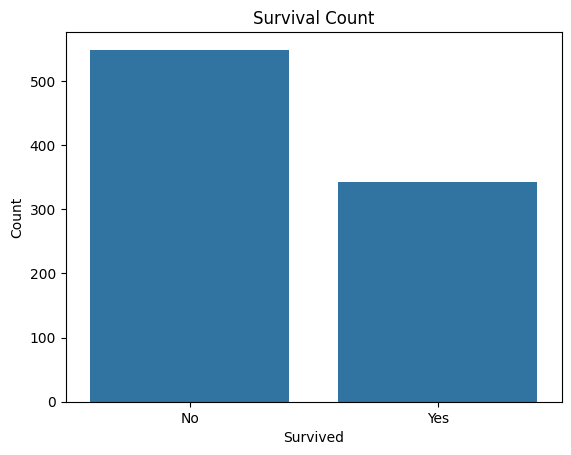

In [7]:
sns.countplot(x='survived_label', data=df, order=['No','Yes'])
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

### 6.2 Survival Rate by Sex
Bar chart showing survival rate for male vs female.

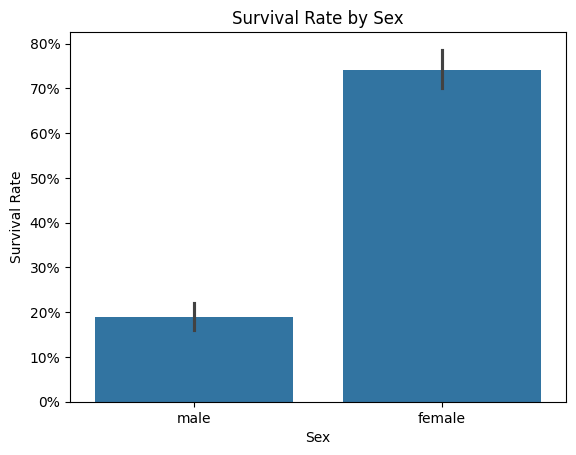

In [8]:
sns.barplot(x='sex', y='survived_num', data=df, order=['male','female'])
plt.title("Survival Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

### 6.3 Survival Rate by Class
Bar chart showing survival rate across First/Second/Third class.

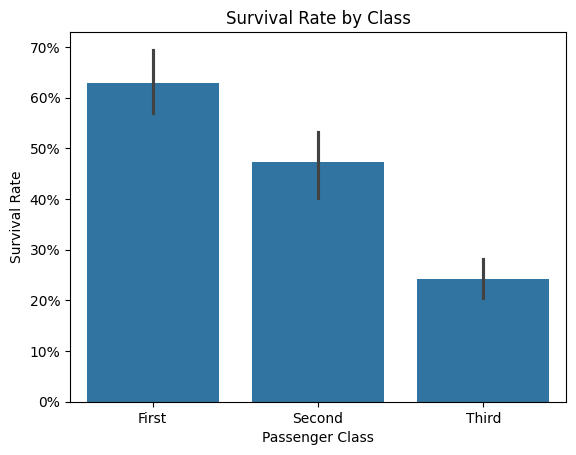

In [9]:
sns.barplot(x='class', y='survived_num', data=df, order=['First','Second','Third'])
plt.title("Survival Rate by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

### 6.4 Survival Rate: Alone vs Not Alone
Bar chart comparing survival for passengers alone vs not alone.

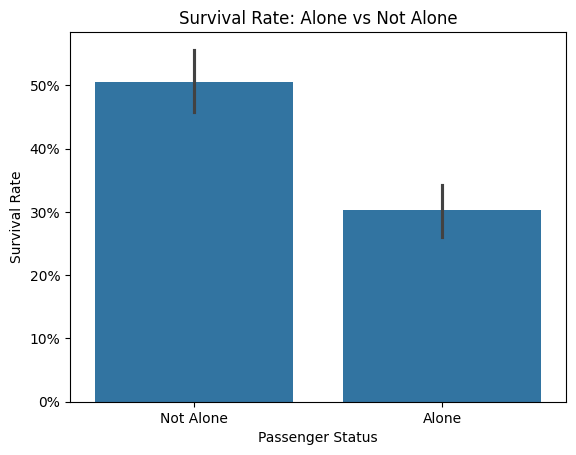

In [10]:
sns.barplot(x='alone_label', y='survived_num', data=df, order=['Not Alone','Alone'])
plt.title("Survival Rate: Alone vs Not Alone")
plt.xlabel("Passenger Status")
plt.ylabel("Survival Rate")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [11]:
# --- Imports & style for this cell ---
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
plt.rcParams['figure.figsize'] = (7, 4)

# --- Ensure helper columns exist (safe no-ops if already created) ---
# survived_num: numeric 0/1 for rate charts
if 'survived_num' not in df.columns:
    if df['survived'].dtype == 'O':  # strings like "No"/"Yes",
        df['survived_num'] = df['survived'].str.capitalize().map({'No':0,'Yes':1})
    else:  # numeric 0/1
        df['survived_num'] = df['survived'].astype(int)

# survived_label: "No"/"Yes" for count chart
if 'survived_label' not in df.columns:
    df['survived_label'] = df['survived'].map({0:'No',1:'Yes'}) if df['survived'].dtype!='O' \
                           else df['survived'].str.capitalize()

# alone_label: "Not Alone"/"Alone" for readability
if 'alone_label' not in df.columns and 'alone' in df.columns:
    df['alone_label'] = df['alone'].map({False:'Not Alone', True:'Alone'})

# (Plotting moved to dedicated 6.1-6.4 cells below)

### 6.5 Age and Survival
Do children or certain age bands have better outcomes?

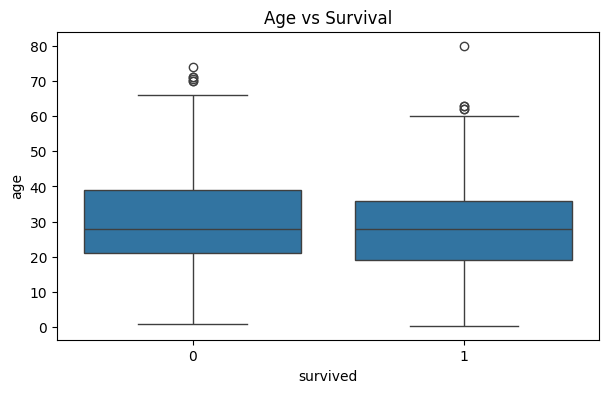

age
[0, 10)     0.612903
[10, 20)    0.401961
[20, 30)    0.350000
[30, 40)    0.437126
[40, 50)    0.382022
[50, 60)    0.416667
[60, 80)    0.240000
Name: survived, dtype: float64


In [12]:
# Boxplot age vs survived
sns.boxplot(x="survived", y="age", data=df)
plt.title("Age vs Survival")
plt.show()

# Optional: age bands
age_bins = pd.cut(df['age'], bins=[0,10,20,30,40,50,60,80], right=False)
age_band_survival = df.groupby(age_bins, observed=False)['survived'].mean()

# Display survival rates by age band
print(age_band_survival)

### 6.6 Traveling Alone or Not
The dataset includes an `alone` column that indicates whether a passenger was traveling solo.  
We can compare survival rates between passengers who were alone versus those with family.

In [27]:
# Survival rates by alone status
survival_by_alone = (
    df.groupby('alone')['survived']
    .mean()
    .rename(index={False: 'Not Alone', True: 'Alone'})
    .rename_axis(None)   # removes the "alone" label above the index
)

print("Survival Rate by Alone Status:")
print(survival_by_alone)

Survival Rate by Alone Status:
Not Alone    0.505650
Alone        0.303538
Name: survived, dtype: float64


### 6.7 Multivariate View
Combine sex and class to see interaction effects.

In [23]:
pivot_sex_class = df.pivot_table(
    values='survived',
    index='sex',
    columns='class',
    aggfunc='mean',
    observed=False  # keeps current behavior, removes warning
)

pivot_sex_class

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## 7. Key Findings
Summary of the most important insights discovered.

### Key Findings (summary)
- Overall survival rate for the Titanic is approximately 38.38%.
- Survival differs strongly by sex: females survived at ~74.20% vs males at ~18.89% (see `survived` by `sex`).
- Passenger class is predictive: First-class passengers survived at ~62.96%, Second-class at ~47.28%, and Third-class at ~24.24% (see `survived` by `class`).
- Travel companions: passengers NOT alone survived at ~50.56% compared with ~30.35% for those marked as alone (see `alone`).
- Embarkation differences: survival rates vary by `embark_town` (Cherbourg ~55.35%, Queenstown ~38.96%, Southampton ~33.69%) — see the `survival_by_embark` table for details.  Hypothesis is that a greater number of higher surviving categories (i.e. females, first class) embarked from Cherbourg (highest survival) vs Southampton (lowest survival).  Additional analysis would need done to determine what, if any, correlation exists.
- Females in first and second class survived at very high rates, ~96.8% and ~92.1% respectively.



## 8. Collaboration & Workflow Notes
- Mixed **Markdown** (narrative) and **Code** (analysis) throughout.
- Re-ran the notebook end-to-end to ensure reproducibility.
- Saved and pushed to GitHub.

In [15]:
# (No-op cell, just a reminder of Git steps — run these in your terminal, not here)
print("""
In your TERMINAL (not in the notebook):

git add .
git commit -m "Complete Titanic EDA with visuals and conclusions"
git push
""")


In your TERMINAL (not in the notebook):

git add .
git commit -m "Complete Titanic EDA with visuals and conclusions"
git push

